In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
%matplotlib inline
df = pd.read_csv("peace.csv")
df.head()

,Unnamed: 0,dataset,ccode,cnumb,cluster,clust2,cname,yrbeg,yrend,decade,...,L13,Phat13,L14,Phat14,L15,Phat15,L16,Phat16,L17,Phat17
0,1,8,AFG2,2,AFG,AFG,Afghanistan-Taliban,93,NaN,5,...,-0.958707,0.277137,-2.874360,0.053436,1.327642,0.790450,-0.605454,0.353097,3.596548,0.973313
1,2,1,AFG1,1,AFG,AFG,Afghanistan,78,92,4,...,-0.959196,0.277039,-3.277615,0.036347,0.924387,0.715935,-0.605943,0.352985,3.596059,0.973301
2,3,9,MEX,88,MEX,MEX,Mexico,92,94,5,...,-0.150724,0.462390,1.407364,0.803350,5.609365,0.996350,0.202529,0.550460,4.404531,0.987926
3,4,1,RUS,109,RUS,FSU,Russia-Chechnya,94,96,5,...,0.243763,0.560641,-1.834139,0.137746,2.367863,0.914344,0.597017,0.644973,4.799018,0.991829
4,5,9,THA,123,THA,THA,Thailand-Commun.,67,85,3,...,-0.288066,0.428477,0.176477,0.544005,4.378479,0.987611,0.065187,0.516291,4.267189,0.986173


In [2]:
df.shape

(124, 197)

In [3]:
train, test = df.iloc[:70,], df.iloc[70:,]

In [4]:
clf = linear_model.LogisticRegression(C=1e5, random_state=10) #random_state is set.seed
X = train[['un2int', 'wardur', 'geo']].as_matrix()
y = train['pbs2s3'].as_matrix()
clf.fit(X, y)
error_rate = np.sum(clf.predict(X) == y) / len(y)
print("In sample error rate:", error_rate )

In sample error rate: 0.614285714286


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


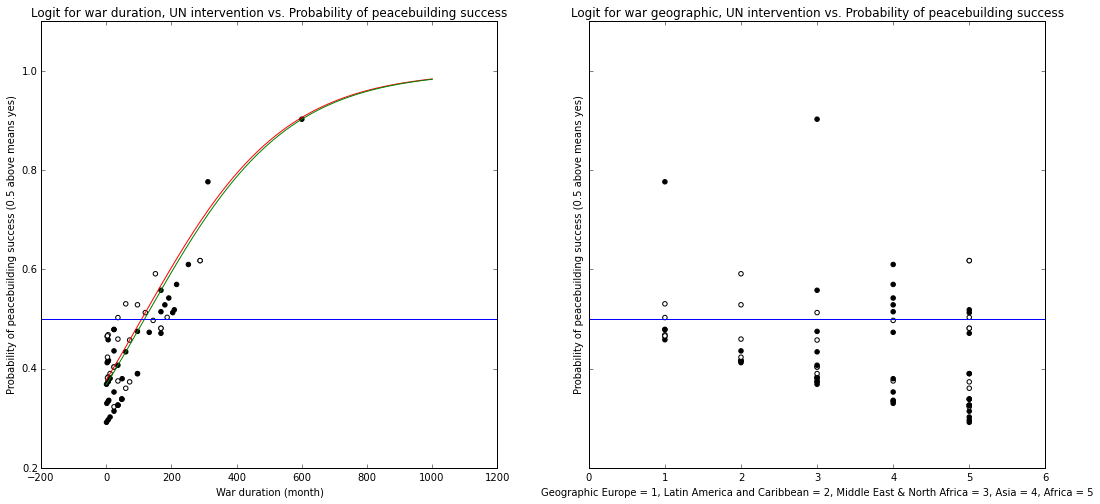

In [76]:
def model(x):
    return 1 / (1 + np.exp(-x))
sake_of_line = np.linspace(0, 1000, 500)
loss1 = model(sake_of_line * clf.coef_[0][1] + clf.coef_[0][0] + 3 * clf.coef_[0][2] + clf.intercept_[0])
loss2 = model(sake_of_line * clf.coef_[0][1] + 3 * clf.coef_[0][2] + clf.intercept_[0])
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(18, 8)
wartype = "Geographic Europe = 1, Latin America and Caribbean = 2, Middle East & North Africa = 3, Asia = 4, Africa = 5"
prob = "Probability of peacebuilding success (0.5 above means yes)"
wardur = "War duration (month)"
predicted_train = clf.predict_proba(X)[:,1]
ax1.scatter(X[:,1], predicted_train, c=X[:,0], cmap='gray')
ax1.set_title("Logit for war duration, UN intervention vs. Probability of peacebuilding success")
ax1.set_xlabel(wardur)
ax1.set_ylabel(prob)
ax1.plot(sake_of_line, loss1, color='red', linewidth=1)
ax1.plot(sake_of_line, loss2, color='green', linewidth=1)
ax1.axhline(y=0.5)
ax2.scatter(X[:,2], predicted_train, c=X[:,0], cmap='gray')
ax2.axhline(y=0.5)
ax2.set_title("Logit for war geographic, UN intervention vs. Probability of peacebuilding success")
ax2.set_xlabel(wartype)
ax2.set_ylabel(prob)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


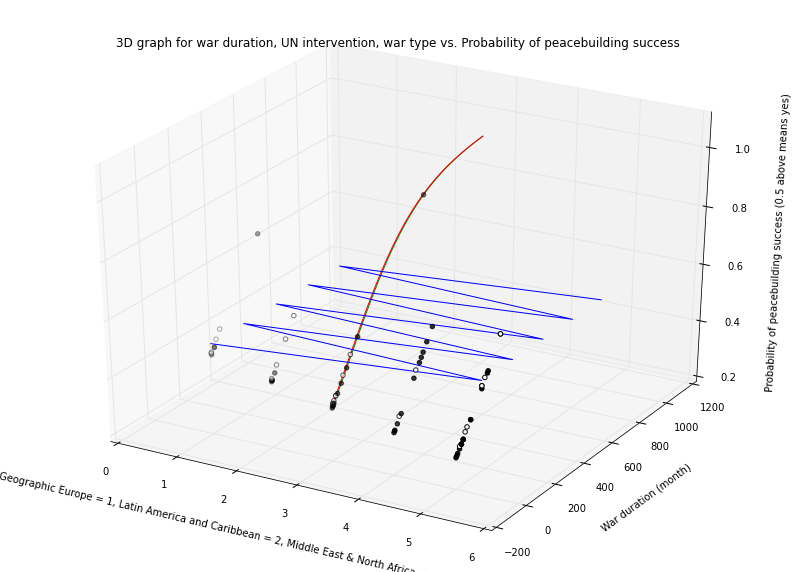

In [77]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
planeX, planeY, planeZ= np.array([1, 2, 3, 4, 5] * 5), np.linspace(0, 1000, 25), np.repeat(0.5, 25)
ax.plot_wireframe(planeX, planeY, planeZ, rstride=100, cstride=100)
ax.plot_wireframe(np.repeat(3, 500), sake_of_line, loss1, color='red')
ax.plot_wireframe(np.repeat(3, 500), sake_of_line, loss2, color='green')
ax.scatter(X[:,2], X[:,1], predicted_train, c=X[:,0], cmap='gray')
ax.set_title("3D graph for war duration, UN intervention, war type vs. Probability of peacebuilding success")
ax.set_xlabel(wartype)
ax.set_ylabel(wardur)
ax.set_zlabel(prob)
fig.set_size_inches(14, 10)

In [123]:
def table_output(crosstab):
    print(crosstab)
    print("False negative rate (type 1):", crosstab[1][0] / crosstab["All"][0])
    print("False positive rate (type 2):", crosstab[0][1] / crosstab[0][2])
    print("Overall success rate:", (crosstab[0][0] + crosstab[1][1]) / crosstab["All"][2])
# Error calculation:
predicted_label_train = predicted_train > 0.5
error = 1 - (np.sum(predicted_label_train == y) / len(y))
crosstab_train = pd.crosstab(predicted_label_train, y, rownames=['Predicted'], colnames=["Actual"], margins=True)
table_output(crosstab_train)

Actual      0   1  All
Predicted             
False      32  20   52
True        7  11   18
All        39  31   70
False negative rate (type 1): 0.384615384615
False positive rate (type 2): 0.179487179487
Overall success rate: 0.614285714286


In [124]:
X_test = test[['un2int', 'wardur', 'geo']].as_matrix()
y_test = test['pbs2s3'].as_matrix()
predicted_test = clf.predict_proba(X_test)[:,1]
predicted_label_test = predicted_test > 0.5
error_test = 1 - (np.sum(predicted_label_test == y_test) / len(y_test))
print("Out of sample error is", error_test)
crosstab_test = pd.crosstab(predicted_label_test, y_test, rownames=['Predicted'], colnames=["Actual"], margins=True)
table_output(crosstab_test)

Out of sample error is 0.314814814815
Actual      0   1  All
Predicted             
False      34   9   43
True        8   3   11
All        42  12   54
False negative rate (type 1): 0.209302325581
False positive rate (type 2): 0.190476190476
Overall success rate: 0.685185185185


In [112]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(random_state=11) #set seed = 11

In [125]:
clf2.fit(X, y)
pred_clf2_train = clf2.predict(X)
error = 1 - (np.sum(pred_clf2_train == y) / len(y))
print("In sample Error rate for random forest is", error)
crosstab_clf2_train = pd.crosstab(pred_clf2_train, y, rownames=['Predicted'], colnames=["Actual"], margins=True)
table_output(crosstab_clf2_train)

In sample Error rate for random forest is 0.0857142857143
Actual      0   1  All
Predicted             
0          36   3   39
1           3  28   31
All        39  31   70
False negative rate (type 1): 0.0769230769231
False positive rate (type 2): 0.0769230769231
Overall success rate: 0.914285714286


In [127]:
pred_clf2_test = clf2.predict(X_test)
error = 1 - (np.sum(pred_clf2_test == y_test) / len(y_test))
print("Out of sample Error rate for random forest is", error)
crosstab_clf2_test = pd.crosstab(pred_clf2_test, y_test, rownames=['Predicted'], colnames=["Actual"], margins=True)
table_output(crosstab_clf2_test)

Out of sample Error rate for random forest is 0.518518518519
Actual      0   1  All
Predicted             
0          19   5   24
1          23   7   30
All        42  12   54
False negative rate (type 1): 0.208333333333
False positive rate (type 2): 0.547619047619
Overall success rate: 0.481481481481
